<a href="https://colab.research.google.com/github/Lizzie1234567/aml-elliptic-gnn/blob/main/%E2%80%9Caml_elliptic_gnn_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **It is strongly reccomended the use of a GPU runtime to sensibly reduce the training times**

In [ ]:
%cd /content/
!git clone https://github.com/Lizzie1234567/aml-elliptic-gnn.git
%cd /content/aml-elliptic-gnn

/content
fatal: destination path 'aml-elliptic-gnn' already exists and is not an empty directory.
/content/aml-elliptic-gnn


In [ ]:
!pip install -r requirements.txt

In [ ]:
!wget -O /content/aml-elliptic-gnn/data/d4w7q6.zip "https://archive.org/download/elliptic-dataset/d4w7q6.zip"

print("Download complete.")

--2023-11-23 19:24:44--  https://archive.org/download/elliptic-dataset/d4w7q6.zip
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia902606.us.archive.org/5/items/elliptic-dataset/d4w7q6.zip [following]
--2023-11-23 19:24:44--  https://ia902606.us.archive.org/5/items/elliptic-dataset/d4w7q6.zip
Resolving ia902606.us.archive.org (ia902606.us.archive.org)... 207.241.228.236
Connecting to ia902606.us.archive.org (ia902606.us.archive.org)|207.241.228.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149299374 (142M) [application/zip]
Saving to: ‘/content/aml-elliptic-gnn/data/d4w7q6.zip’

/aml-elliptic-gnn/d  41%[=======>            ]  59.46M  16.6MB/s    eta 5s     ^C
Download complete.


In [ ]:
import zipfile
import os

zip_path = "/content/aml-elliptic-gnn/data/d4w7q6.zip"  # 压缩文件路径
output_dir = "/content/aml-elliptic-gnn/data/"  # 解压缩目标目录

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

print("Extraction complete.")

BadZipFile: ignored

In [ ]:
!python download_data.py --path=/content/aml-elliptic-gnn

Traceback (most recent call last):
  File "/content/aml-elliptic-gnn/download_data.py", line 21, in <module>
    with ZipFile(os.path.join(data_path, 'tmp/dataset.zip'), 'r') as zObject:
  File "/usr/lib/python3.10/zipfile.py", line 1269, in __init__
    self._RealGetContents()
  File "/usr/lib/python3.10/zipfile.py", line 1336, in _RealGetContents
    raise BadZipFile("File is not a zip file")
zipfile.BadZipFile: File is not a zip file


In [20]:
!python main.py --data=/content/aml-elliptic-gnn/data

Loading configuration from file...
Configuration loaded successfully
Loading graph data...
Graph data loaded successfully
Using CUDA:  True - args.device:  cuda
Starting training models
--------------------------------------------------
Training model: GCN Convolution (tx)
--------------------------------------------------
Epoch   0 | Train Loss: 0.877 | Train Acc:  54.92% | Val Loss: 0.888 | Val Acc: 54.57%
Epoch 100 | Train Loss: 0.245 | Train Acc:  93.35% | Val Loss: 0.238 | Val Acc: 93.61%
Epoch 200 | Train Loss: 0.233 | Train Acc:  93.48% | Val Loss: 0.232 | Val Acc: 93.63%
Epoch 300 | Train Loss: 0.228 | Train Acc:  93.36% | Val Loss: 0.224 | Val Acc: 93.69%
Epoch 400 | Train Loss: 0.226 | Train Acc:  93.15% | Val Loss: 0.227 | Val Acc: 93.60%
Epoch 500 | Train Loss: 0.223 | Train Acc:  93.27% | Val Loss: 0.223 | Val Acc: 93.59%
Epoch 00600: reducing learning rate of group 0 to 8.1000e-03.
Epoch 600 | Train Loss: 0.220 | Train Acc:  93.34% | Val Loss: 0.221 | Val Acc: 93.60%
Epoc

In [22]:
import pandas as pd
df = pd.read_csv('/content/aml-elliptic-gnn/data/metrics.csv')
print(df)

                            model  Precision  Recall     F1  F1 Micro AVG
0            GCN Convolution (tx)      0.831   0.464  0.596         0.938
1        GCN Convolution (tx+agg)      0.792   0.491  0.606         0.939
2            GAT Convolution (tx)      0.814   0.669  0.734         0.952
3        GAT Convolution (tx+agg)      0.801   0.750  0.775         0.958
4           SAGE Convolution (tx)      0.941   0.778  0.852         0.973
5       SAGE Convolution (tx+agg)      0.942   0.819  0.876         0.978
6      Chebyshev Convolution (tx)      0.947   0.784  0.858         0.974
7  Chebyshev Convolution (tx+agg)      0.957   0.860  0.906         0.983
8          GATv2 Convolution (tx)      0.883   0.787  0.832         0.969
9      GATv2 Convolution (tx+agg)      0.859   0.863  0.861         0.973


In [23]:
# only_txagg = df.iloc[1::2]

In [24]:
only_txagg = df

In [25]:
only_txagg.to_markdown(index=False)

'| model                          |   Precision |   Recall |    F1 |   F1 Micro AVG |\n|:-------------------------------|------------:|---------:|------:|---------------:|\n| GCN Convolution (tx)           |       0.831 |    0.464 | 0.596 |          0.938 |\n| GCN Convolution (tx+agg)       |       0.792 |    0.491 | 0.606 |          0.939 |\n| GAT Convolution (tx)           |       0.814 |    0.669 | 0.734 |          0.952 |\n| GAT Convolution (tx+agg)       |       0.801 |    0.75  | 0.775 |          0.958 |\n| SAGE Convolution (tx)          |       0.941 |    0.778 | 0.852 |          0.973 |\n| SAGE Convolution (tx+agg)      |       0.942 |    0.819 | 0.876 |          0.978 |\n| Chebyshev Convolution (tx)     |       0.947 |    0.784 | 0.858 |          0.974 |\n| Chebyshev Convolution (tx+agg) |       0.957 |    0.86  | 0.906 |          0.983 |\n| GATv2 Convolution (tx)         |       0.883 |    0.787 | 0.832 |          0.969 |\n| GATv2 Convolution (tx+agg)     |       0.859 |    0

In [26]:
only_txagg

,model,Precision,Recall,F1,F1 Micro AVG
0,GCN Convolution (tx),0.831,0.464,0.596,0.938
1,GCN Convolution (tx+agg),0.792,0.491,0.606,0.939
2,GAT Convolution (tx),0.814,0.669,0.734,0.952
3,GAT Convolution (tx+agg),0.801,0.750,0.775,0.958
4,SAGE Convolution (tx),0.941,0.778,0.852,0.973
5,SAGE Convolution (tx+agg),0.942,0.819,0.876,0.978
6,Chebyshev Convolution (tx),0.947,0.784,0.858,0.974
7,Chebyshev Convolution (tx+agg),0.957,0.860,0.906,0.983
8,GATv2 Convolution (tx),0.883,0.787,0.832,0.969
9,GATv2 Convolution (tx+agg),0.859,0.863,0.861,0.973


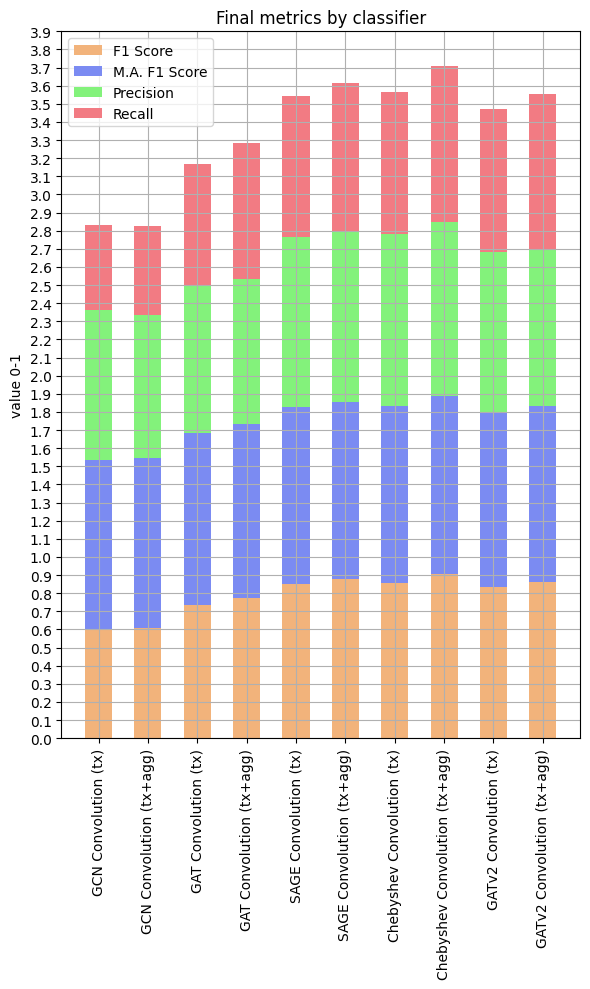

In [27]:
import utils as u

u.aggregate_plot(only_txagg)

In [28]:
df = df.reindex([0, 1, 4, 2, 3]).reset_index(drop=True)

In [29]:
labels = df['model'].to_numpy()

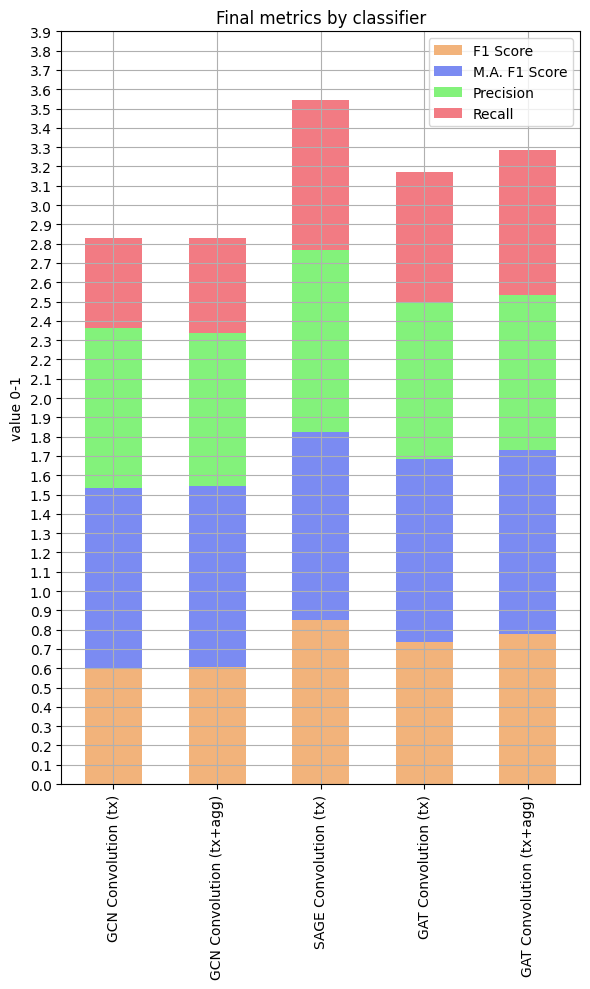

In [30]:
import matplotlib.pyplot as plt
import numpy as np

precision = df['Precision'].to_numpy()
recall = df['Recall'].to_numpy()
f1 = df['F1'].to_numpy()
maf1 = df['F1 Micro AVG'].to_numpy()

x = np.arange(len(labels))  # the label locations
width = 0.55  # the width of the bars
fig, ax = plt.subplots(figsize=(6, 10))
f1_rects = ax.bar(x, f1, width, label='F1 Score',color='#f2b37b')
MAf1_rects = ax.bar(x , maf1, width, label='M.A. F1 Score',color='#7b8bf2',bottom=f1)
prec_rects = ax.bar(x, precision, width, label='Precision',color='#83f27b',bottom=maf1 + f1)
rec_rects = ax.bar(x, recall, width, label='Recall',color='#f27b83',bottom=maf1 + f1 + precision)

ax.set_ylabel('value 0-1')
ax.set_title('Final metrics by classifier')
ax.set_xticks(np.arange(0,len(labels),1))
ax.set_yticks(np.arange(0,4,0.1))
ax.set_xticklabels(labels=labels)
ax.legend()

plt.xticks(rotation=90)
plt.grid(True)
fig.tight_layout()
plt.show()

In [31]:
import os.path as osp
import pandas as pd

def load_data(data_path):

    # Read edges, features and classes from csv files
    df_edges = pd.read_csv(osp.join(data_path, "elliptic_txs_edgelist.csv"))
    df_features = pd.read_csv(osp.join(data_path, "elliptic_txs_features.csv"), header=None)
    df_classes = pd.read_csv(osp.join(data_path, "elliptic_txs_classes.csv"))

    # Name colums basing on index
    colNames1 = {'0': 'txId', 1: "Time step"}
    colNames2 = {str(ii+2): "Local_feature_" + str(ii+1) for ii in range(94)}
    colNames3 = {str(ii+96): "Aggregate_feature_" + str(ii+1) for ii in range(72)}

    colNames = dict(colNames1, **colNames2, **colNames3)
    colNames = {int(jj): item_kk for jj, item_kk in colNames.items()}

    # Rename feature columns
    df_features = df_features.rename(columns=colNames)
    #df_features = df_features.drop(df_features.iloc[:, 96:], axis=1)

    # Map unknown class to '3'
    df_classes.loc[df_classes['class'] == 'unknown', 'class'] = '3'

    # Merge classes and features in one Dataframe
    df_class_feature = pd.merge(df_classes, df_features)

    # Exclude records with unknown class transaction
    df_class_feature = df_class_feature[df_class_feature["class"] != '3']

    # Build Dataframe with head and tail of transactions (edges)
    known_txs = df_class_feature["txId"].values
    df_edges = df_edges[(df_edges["txId1"].isin(known_txs)) & (df_edges["txId2"].isin(known_txs))]

    # Build indices for features and edge types
    features_idx = {name: idx for idx, name in enumerate(sorted(df_class_feature["txId"].unique()))}
    class_idx = {name: idx for idx, name in enumerate(sorted(df_class_feature["class"].unique()))}

    # Apply index encoding to features
    df_class_feature["txId"] = df_class_feature["txId"].apply(lambda name: features_idx[name])
    df_class_feature["class"] = df_class_feature["class"].apply(lambda name: class_idx[name])

    # Apply index encoding to edges
    df_edges["txId1"] = df_edges["txId1"].apply(lambda name: features_idx[name])
    df_edges["txId2"] = df_edges["txId2"].apply(lambda name: features_idx[name])

    return df_class_feature, df_edges

In [32]:
#import loader as l
load_data("/content/aml-elliptic-gnn/data")

(         txId  class  Time step  Local_feature_1  Local_feature_2  \
 3       32385      1          1         0.163054         1.963790   
 9       32136      1          1        -0.005027         0.578941   
 10      32249      1          1        -0.147852        -0.184668   
 11       4181      1          1        -0.151357        -0.184668   
 16        726      1          1        -0.172306        -0.184668   
 ...       ...    ...        ...              ...              ...   
 203752  10994      1         49        -0.159293        -0.037276   
 203754  22712      1         49        -0.172962        -0.126566   
 203759  22676      0         49        -0.170412        -0.078164   
 203763  20644      1         49        -0.093732        -0.116160   
 203766  22678      0         49        -0.172014        -0.078182   
 
         Local_feature_3  Local_feature_4  Local_feature_5  Local_feature_6  \
 3             -0.646376        12.409294        -0.063725         9.782742   


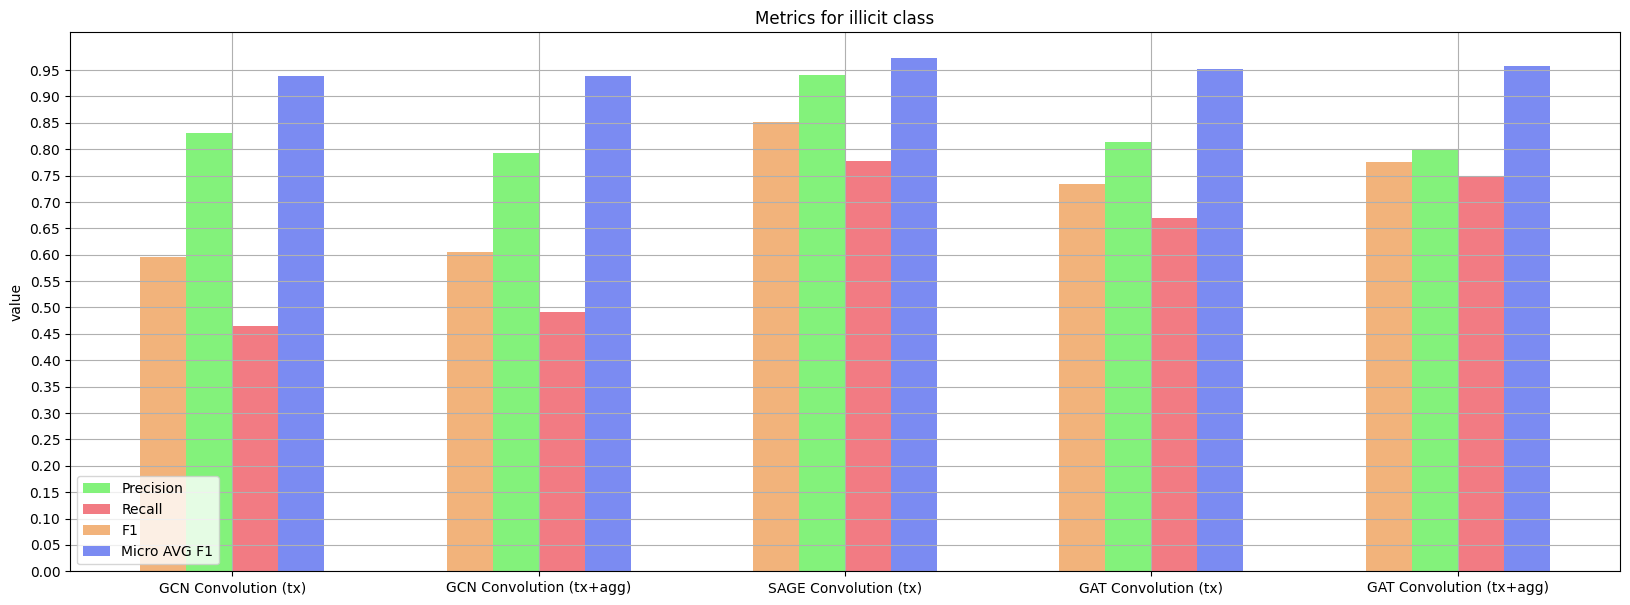

In [33]:
import utils as u
u.plot_results(df)

In [34]:
import warnings
import torch
import pandas as pd
import utils as u
import os
from loader import load_data, data_to_pyg
from train import train, test
from models import models
from argparse import ArgumentParser
from models.custom_gat.model import GAT

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

data_path = '/content/aml-elliptic-gnn/data'

print("Loading configuration from file...")
args = u.get_config()
print("Configuration loaded successfully")
print("="*50)
print("Loading graph data...")
data_path = args.data_path if data_path is None else data_path
features, edges = load_data(data_path)
data = data_to_pyg(features, edges)
print("Graph data loaded successfully")
print("="*50)
args.use_cuda = (torch.cuda.is_available() and args.use_cuda)
args.device = 'cpu'
if args.use_cuda:
    args.device = 'cuda'
print ("Using CUDA: ", args.use_cuda, "- args.device: ", args.device)

args.num_features = data.num_features

Loading configuration from file...
Configuration loaded successfully
Loading graph data...
Graph data loaded successfully
Using CUDA:  True - args.device:  cuda


In [35]:
import random
import numpy as np

def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


seed_everything(42)

In [36]:
from torch_geometric.nn import GCNConv, GATConv, SAGEConv, ChebConv
from torch.nn import Module, Linear
from torch_geometric.nn.conv.gatv2_conv import GATv2Conv
import torch.nn.functional as F

In [37]:
class SAGEConvolution(Module):
    def __init__(self, args):
        super().__init__()
        self.conv1 = SAGEConv(165, 110)
        self.conv2 = SAGEConv(110, 2)

    def forward(self, data):
        x, edge_index = data
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return x, edge_index

In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import ChebConv, BatchNorm

class ChebyshevConvolution(nn.Module):
    def __init__(self, args, kernel=[1, 1]):
        super().__init__()
        self.conv1 = ChebConv(args['num_features'], args['hidden_units'], kernel[0], normalization="rw")
        self.conv2 = ChebConv(args['hidden_units'], args['num_classes'], kernel[1], normalization="rw")

    def forward(self, data):
        x, edge_index = data
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return x, edge_index

In [39]:
class GATv2Convolution(Module):
    def __init__(self, args):
        super(GATv2Convolution, self).__init__()
        self.conv1 = GATv2Conv(args['num_features'], args['hidden_units'])
        self.lin1 = Linear(args['num_features'], args['hidden_units'])
        self.conv2 = GATv2Conv(args['hidden_units'], args['num_classes'])
        self.lin2 = Linear(args['hidden_units'], args['num_classes'])

    def forward(self, data):
        x, edge_index = data
        x = F.elu(self.conv1(x, edge_index) + self.lin1(x))
        x = self.conv2(x, edge_index) + self.lin2(x)
        return F.log_softmax(x, dim=1), edge_index

In [40]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [41]:
import torch
import torch.nn.functional as F
from torch.optim import Adam
from utils import accuracy

def train(args, model, data):
    """Train a GNN model and return the trained model."""
    optimizer = Adam(model.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])
    scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=100, factor=0.9, verbose=True)
    epochs = args['epochs']
    model.train()

    best_val_loss = float('inf')
    patience = 1000
    epochs_since_best = 0

    for epoch in range(epochs + 1):
        optimizer.zero_grad()
        out, _ = model((data.x, data.edge_index))
        loss = F.cross_entropy(out[data.train_mask], data.y[data.train_mask])
        acc = accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
        loss.backward()
        optimizer.step()

        # Validation
        with torch.no_grad():
          val_loss = F.cross_entropy(out[data.val_mask], data.y[data.val_mask])
          val_acc = accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])

          # Adjust learning rate
          scheduler.step(val_loss)

        # Check if validation loss has improved
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_since_best = 0
        else:
            epochs_since_best += 1

        # Print metrics every 10 epochs
        if epoch % 100 == 0:
            print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: '
                  f'{acc*100:>6.2f}% | Val Loss: {val_loss:.3f} | '
                  f'Val Acc: {val_acc*100:.2f}%')

        # Check if early stopping criteria is met
        if epochs_since_best >= patience:
            print(f'Early stopping at epoch {epoch}')
            break

    return model

@torch.no_grad()
def test(model, data):
    """Evaluate the model on test set and print the accuracy score."""
    model.eval()
    out, _ = model((data.x, data.edge_index))
    acc = accuracy(out[data.test_mask].argmax(dim=1), data.y[data.test_mask])
    return acc


In [42]:
#model = SAGEConvolution(args).to(args.device)
model = GATv2Convolution(args).to(args.device)
#model = ChebyshevConvolution(args).to(args.device)
args.lr = 9e-3
args.epochs = 13500

compare_illicit = pd.DataFrame(columns=['model','Precision','Recall', 'F1', 'F1 Micro AVG'])
print("Starting training models")
print("="*50)
data = data.to(args.device)
print('-'*50)
print(f"Training model")
print('-'*50)
train(args, model, data)
print('-'*50)
print(f"Testing model")
print('-'*50)
test(model, data)
print('-'*50)
print(f"Computing metrics for model")
print('-'*50)

Starting training models
--------------------------------------------------
Training model
--------------------------------------------------
Epoch   0 | Train Loss: 0.708 | Train Acc:  63.48% | Val Loss: 0.703 | Val Acc: 63.24%
Epoch 100 | Train Loss: 0.055 | Train Acc:  98.28% | Val Loss: 0.098 | Val Acc: 97.35%
Epoch 200 | Train Loss: 0.032 | Train Acc:  99.04% | Val Loss: 0.097 | Val Acc: 97.52%
Epoch 00289: reducing learning rate of group 0 to 8.1000e-03.
Epoch 300 | Train Loss: 0.024 | Train Acc:  99.38% | Val Loss: 0.106 | Val Acc: 97.47%
Epoch 00390: reducing learning rate of group 0 to 7.2900e-03.
Epoch 400 | Train Loss: 0.025 | Train Acc:  99.33% | Val Loss: 0.105 | Val Acc: 97.42%
Epoch 00491: reducing learning rate of group 0 to 6.5610e-03.
Epoch 500 | Train Loss: 0.019 | Train Acc:  99.58% | Val Loss: 0.109 | Val Acc: 97.39%
Epoch 00592: reducing learning rate of group 0 to 5.9049e-03.
Epoch 600 | Train Loss: 0.016 | Train Acc:  99.66% | Val Loss: 0.116 | Val Acc: 97.29%
E

In [43]:
compare_illicit = compare_illicit.append(u.compute_metrics(model, "GATv2Conv", data, compare_illicit), ignore_index=True)

In [44]:
compare_illicit

,model,Precision,Recall,F1,F1 Micro AVG
0,GATv2Conv,0.877,0.839,0.858,0.973


In [45]:
compare_illicit

,model,Precision,Recall,F1,F1 Micro AVG
0,GATv2Conv,0.877,0.839,0.858,0.973


In [46]:
# model ChebConv
# args.lr = 9e-3
# args.epochs = 13500 (e.s. 3000)
# scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=100, factor=0.9, verbose=True)
# kernel [1, 1]
# normalization rw
# ChebConv	0.961 0.867	0.912	0.984

In [47]:
# model GATv2Conv
# args.lr = 1e-3
# args.epochs = 13500 (e s. 1143)
# scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=100, factor=0.9, verbose=True)
# GATv2Conv	0.896	0.876	0.885	0.978

In [48]:
# model SageConv
# args.lr = 1e-3
# args.epochs = 13500 (e.s. 3000)
# scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=100, factor=0.9, verbose=True)
# ChebConv	0.957	0.865	0.909	0.983

In [49]:
# model SageConv
#args.lr = 1e-3
#args.epochs = 13500
